# BREAST CANCER CLASSIFICATION USING SUPPORT VECTOR MACHINES

By Faisal Shenawy


# STEP #1: PROBLEM STATEMENT


- Predicting if the cancer diagnosis is benign or malignant based on several observations/features 
- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign

# Data Source 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


# STEP #2: Importing Libraries 

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline

# STEP #2: Importing  Data  

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [3]:
# Features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Target names
print(cancer.target_names)

['malignant' 'benign']


In [5]:
# Shape of data
print(cancer.data.shape)

(569, 30)


In [6]:
# Description of the dataset
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
df_Cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [8]:
df_Cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [9]:
df_Cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df_Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# STEP #3 Visualize the Data 

/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

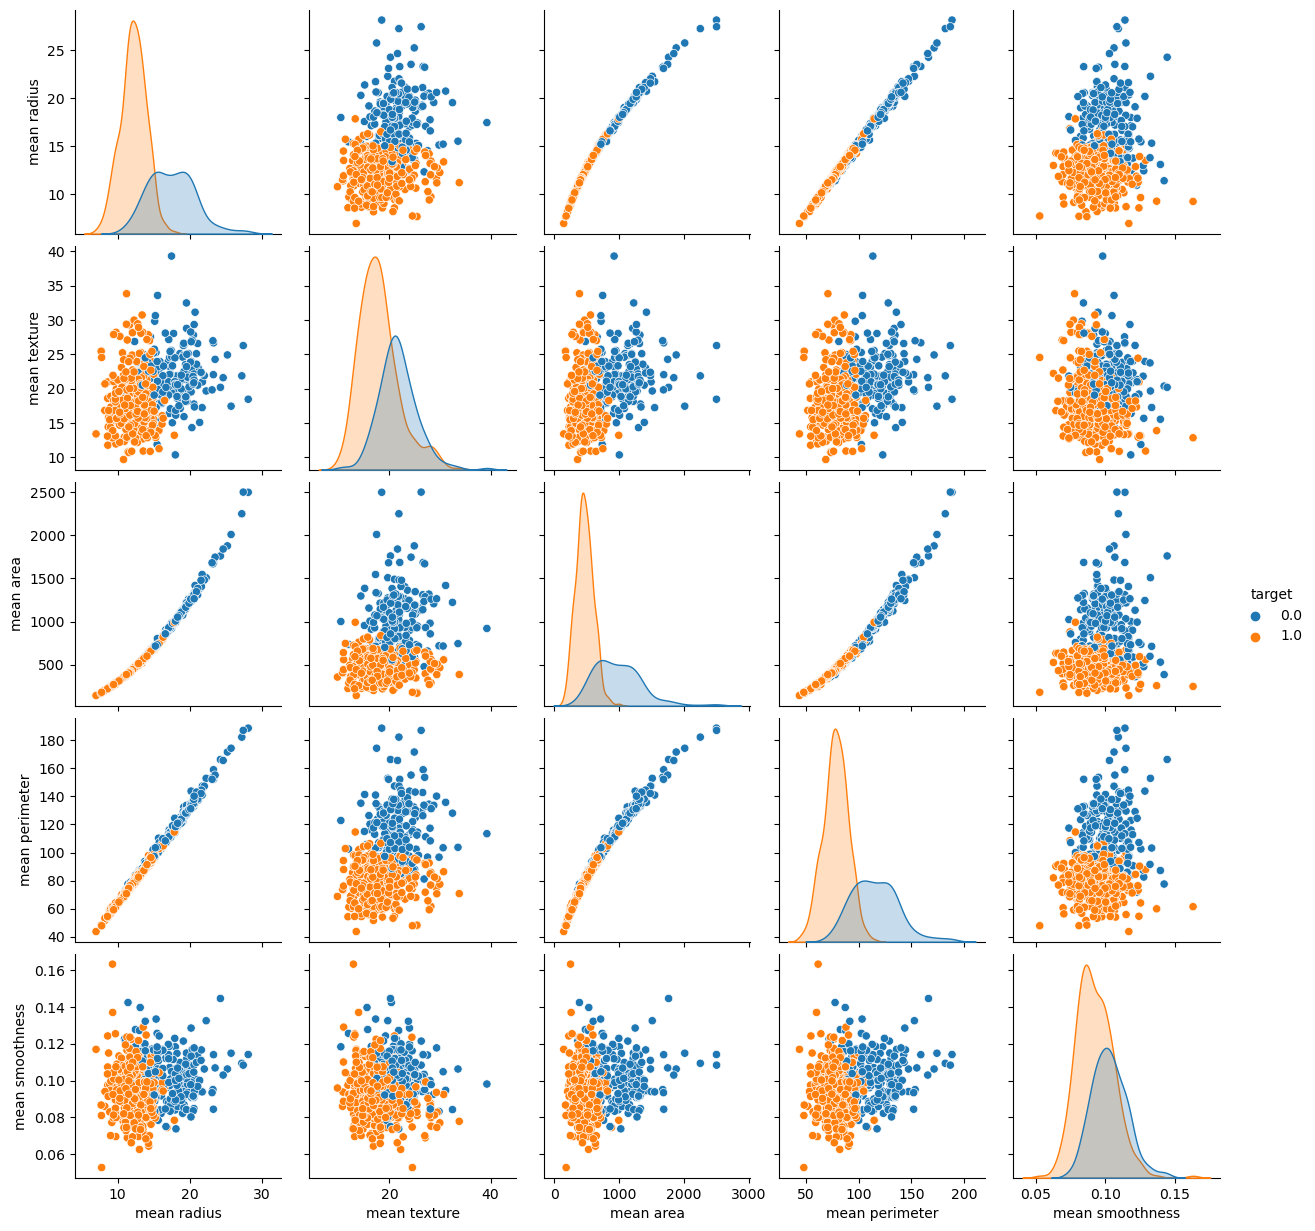

In [11]:
sns.pairplot(df_Cancer,  hue = 'target',vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] );

<Axes: ylabel='count'>

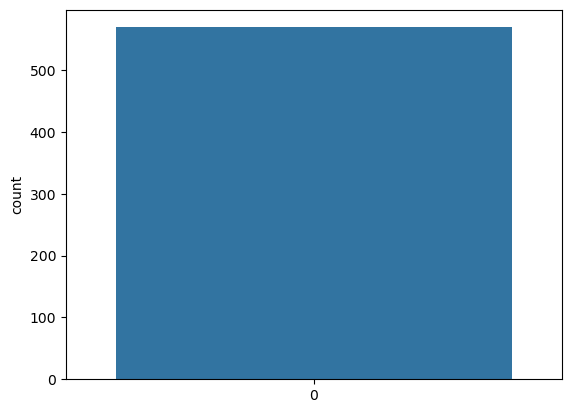

In [12]:
sns.countplot(df_Cancer['target'], label = "Count") 

/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='mean area', ylabel='mean smoothness'>

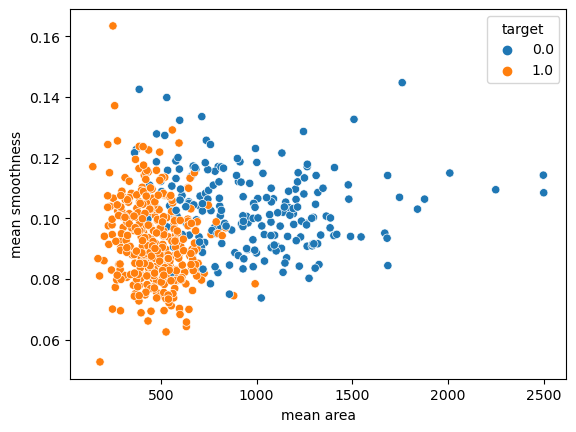

In [13]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_Cancer)

/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='mean perimeter', ylabel='mean texture'>

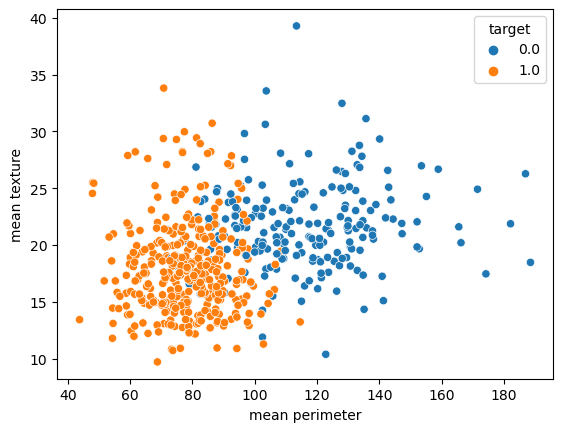

In [14]:
sns.scatterplot(x = 'mean perimeter', y = 'mean texture', hue = 'target', data = df_Cancer)

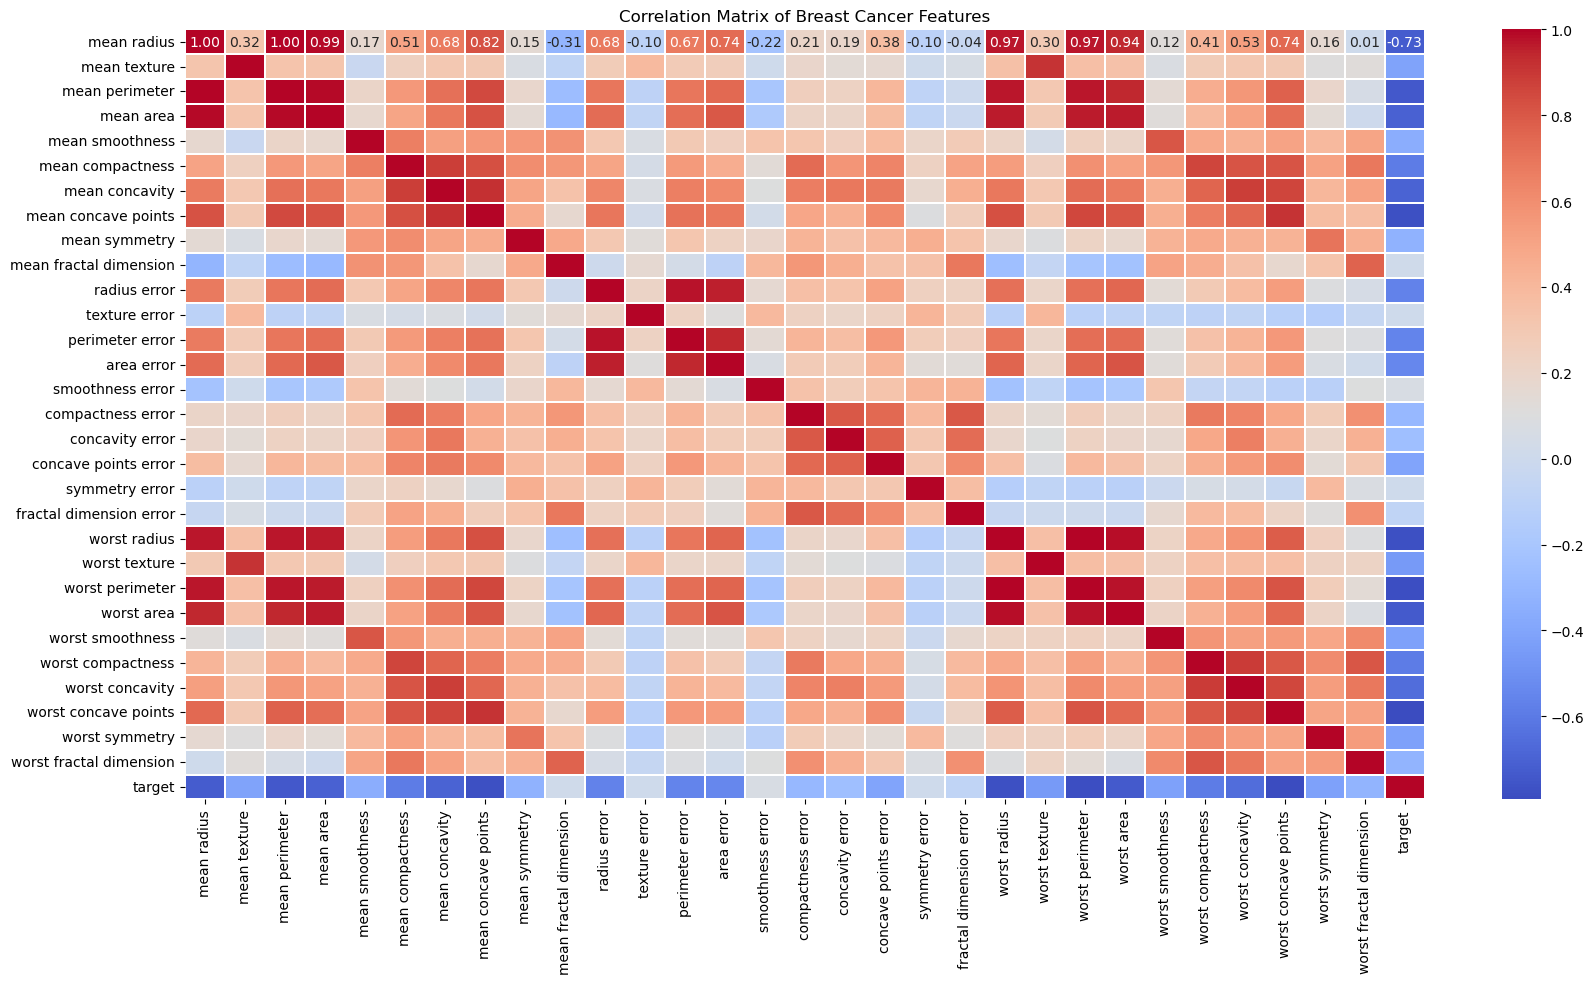

In [15]:

# Calculate the correlation matrix
corr_matrix = df_Cancer.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()

# Step #4 Model Training 

In [16]:
X = df_Cancer.drop(['target'],axis = 1 )

In [17]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
y = df_Cancer['target']

In [19]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [21]:
x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
272,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.219500,0.108800,0.1721,0.06194,...,28.190,28.18,195.90,2384.0,0.12720,0.47250,0.580700,0.18410,0.2833,0.08858
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.230,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289
405,10.940,18.59,70.39,370.0,0.10040,0.07460,0.049440,0.029320,0.1486,0.06615,...,12.400,25.58,82.76,472.4,0.13630,0.16440,0.141200,0.07887,0.2251,0.07732
175,8.671,14.45,54.42,227.2,0.09138,0.04276,0.000000,0.000000,0.1722,0.06724,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.000000,0.00000,0.2592,0.07848
191,12.770,21.41,82.02,507.4,0.08749,0.06601,0.031120,0.028640,0.1694,0.06287,...,13.750,23.50,89.04,579.5,0.09388,0.08978,0.051860,0.04773,0.2179,0.06871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,15.490,19.97,102.40,744.7,0.11600,0.15620,0.189100,0.091130,0.1929,0.06744,...,21.200,29.41,142.10,1359.0,0.16810,0.39130,0.555300,0.21210,0.3187,0.10190
249,11.520,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,...,12.650,21.19,80.88,491.8,0.13890,0.15820,0.180400,0.09608,0.2664,0.07809
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.139700,0.05087,0.3282,0.08490
247,12.890,14.11,84.95,512.2,0.08760,0.13460,0.137400,0.039800,0.1596,0.06409,...,14.390,17.70,105.00,639.1,0.12540,0.58490,0.772700,0.15610,0.2639,0.11780


In [22]:
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
230,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,0.2131,0.06325,...,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.5018,0.25430,0.3109,0.09061
385,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.1312,0.1581,0.2675,0.13590,0.2477,0.06836
266,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
180,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,0.05770,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.26880,0.2856,0.08082
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.14180,0.2218,0.07820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,14.76,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,17.27,17.93,114.20,880.8,0.1220,0.2009,0.2151,0.12510,0.3109,0.08187
108,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.29100,0.4055,0.09789
261,17.35,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,0.05307,...,19.85,31.47,128.20,1218.0,0.1240,0.1486,0.1211,0.08235,0.2452,0.06515
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.53,38.54,145.40,1437.0,0.1401,0.3762,0.6399,0.19700,0.2972,0.09075


In [23]:
x_train.shape

(455, 30)

In [24]:
y_train.shape

(455,)

In [25]:
x_test.shape

(114, 30)

In [26]:
y_test.shape

(114,)

In [34]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

# Step #5 Evaluating the model 

In [38]:
y_pred = svc_model.predict(x_test)

In [39]:
y_pred

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.])

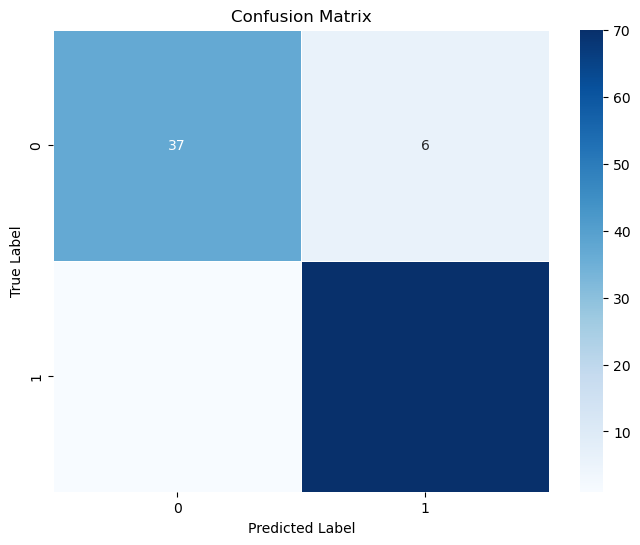

In [42]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91        43
         1.0       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



# STEP #6: IMPROVING THE MODEL

In [46]:
min_train = x_train.min()
min_train

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.771400
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [48]:
range_train = (x_train - min_train).max()
range_train

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.267320
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.047480
radius error                  2.761500
texture error                 4.524800
perimeter error              21.208600
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.053578
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.147230
worst compactness        

In [49]:
x_train_scaled = (x_train - min_train)/range_train

In [50]:
x_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
272,0.698992,0.367128,0.715293,0.571580,0.449441,0.661080,0.514292,0.540755,0.333838,0.252317,...,0.720740,0.423482,0.724588,0.540405,0.380561,0.431945,0.463818,0.634172,0.249951,0.219992
58,0.287236,0.308997,0.268261,0.162757,0.303791,0.069243,0.001621,0.020711,0.383333,0.106361,...,0.224120,0.263428,0.198366,0.107870,0.210079,0.033588,0.001474,0.038271,0.172285,0.051489
405,0.187373,0.284083,0.183816,0.096076,0.518844,0.206569,0.115839,0.145726,0.215152,0.340986,...,0.159018,0.353306,0.161114,0.070586,0.442369,0.133025,0.112780,0.271684,0.135226,0.146137
175,0.079985,0.140830,0.073457,0.035504,0.420875,0.087461,0.000000,0.000000,0.334343,0.363943,...,0.047385,0.122807,0.039594,0.018187,0.305848,0.041990,0.000000,0.000000,0.202444,0.153745
191,0.273984,0.381661,0.264184,0.154358,0.378625,0.174435,0.072915,0.142346,0.320202,0.271904,...,0.207044,0.297166,0.192390,0.096908,0.154248,0.060628,0.041422,0.164416,0.121033,0.089663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.402717,0.331834,0.405017,0.255016,0.688281,0.511821,0.443065,0.452932,0.438889,0.368155,...,0.472074,0.456680,0.456646,0.288488,0.658358,0.353164,0.443530,0.730623,0.319732,0.307359
249,0.214823,0.157439,0.207864,0.111474,0.528620,0.219587,0.101406,0.145577,0.415657,0.246841,...,0.167912,0.234818,0.151751,0.075354,0.460029,0.127010,0.144089,0.330968,0.216637,0.151187
63,0.103744,0.120415,0.106489,0.049799,0.266971,0.254863,0.140300,0.108350,0.646970,0.414280,...,0.073995,0.181916,0.075601,0.030697,0.184677,0.136324,0.111581,0.175233,0.338459,0.195855
247,0.279663,0.129066,0.284431,0.156394,0.379820,0.431019,0.321931,0.197813,0.270707,0.297599,...,0.229811,0.140621,0.271876,0.111556,0.368335,0.540996,0.617173,0.537720,0.211709,0.411649


/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='mean area', ylabel='mean smoothness'>

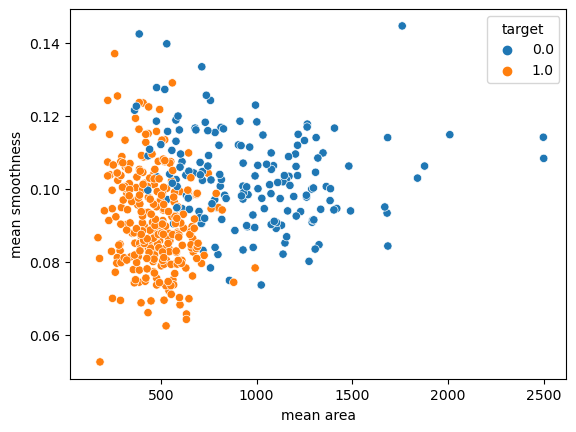

In [52]:
sns.scatterplot(x = x_train['mean area'], y = x_train['mean smoothness'], hue = y_train)

/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='mean area', ylabel='mean smoothness'>

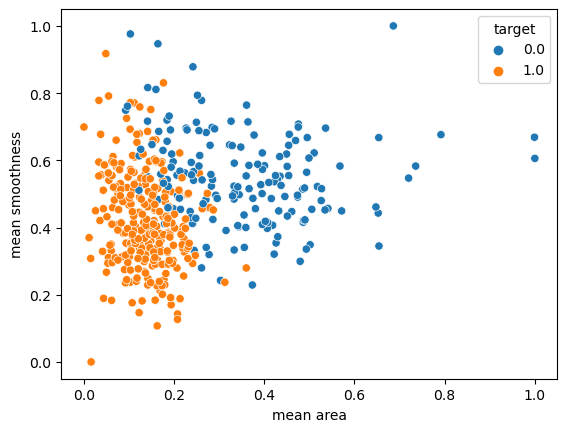

In [53]:
sns.scatterplot(x = x_train_scaled['mean area'], y = x_train_scaled['mean smoothness'], hue = y_train)

In [54]:
min_test = x_test.min()
min_test

mean radius                  8.196000
mean texture                 9.710000
mean perimeter              51.710000
mean area                  201.900000
mean smoothness              0.072740
mean compactness             0.033930
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.116700
mean fractal dimension       0.050540
radius error                 0.115300
texture error                0.362100
perimeter error              0.757000
area error                   8.205000
smoothness error             0.002866
compactness error            0.004711
concavity error              0.000000
concave points error         0.000000
symmetry error               0.010650
fractal dimension error      0.001087
worst radius                 8.964000
worst texture               12.020000
worst perimeter             57.260000
worst area                 242.200000
worst smoothness             0.088640
worst compactness            0.054450
worst concav

In [55]:
range_test = (x_test - min_test).max()
range_test

mean radius                  19.024000
mean texture                 22.760000
mean perimeter              130.390000
mean area                  2048.100000
mean smoothness               0.090660
mean compactness              0.311470
mean concavity                0.426400
mean concave points           0.187800
mean symmetry                 0.173900
mean fractal dimension        0.044480
radius error                  1.176700
texture error                 2.547900
perimeter error               9.363000
area error                  215.895000
smoothness error              0.014344
compactness error             0.088969
concavity error               0.109100
concave points error          0.034870
symmetry error                0.068300
fractal dimension error       0.020843
worst radius                 24.156000
worst texture                33.390000
worst perimeter             163.540000
worst area                 2973.800000
worst smoothness              0.133960
worst compactness        

In [56]:
x_test_scaled = (x_test - min_test)/range_test

In [57]:
x_test_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
230,0.465412,0.411687,0.473119,0.338411,0.456210,0.395768,0.447936,0.580405,0.554342,0.285746,...,0.439891,0.385445,0.466186,0.318381,0.609585,0.517837,0.522273,0.873883,0.374732,0.405793
385,0.336627,0.596661,0.324105,0.225966,0.155306,0.104119,0.196764,0.280671,0.264520,0.081385,...,0.282580,0.589698,0.274795,0.173515,0.317707,0.158353,0.278414,0.467010,0.205204,0.101790
266,0.126367,0.405975,0.134750,0.070553,0.266270,0.259319,0.149789,0.140682,0.434158,0.323067,...,0.120715,0.327044,0.128531,0.061403,0.243804,0.301047,0.199417,0.272371,0.329399,0.204400
180,1.000000,0.534271,1.000000,1.000000,0.404368,0.505570,0.673311,1.000000,0.364002,0.160971,...,1.000000,0.623839,1.000000,1.000000,0.437145,0.533114,0.555787,0.923711,0.306867,0.272032
566,0.441758,0.807118,0.434006,0.320395,0.130267,0.219507,0.216956,0.282322,0.243243,0.133543,...,0.414638,0.661875,0.424606,0.296523,0.188564,0.389504,0.354184,0.487285,0.135730,0.236234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.345038,0.221002,0.331007,0.227919,0.176594,0.140848,0.108068,0.187859,0.203565,0.192896,...,0.343848,0.176999,0.348172,0.214742,0.249030,0.223742,0.223876,0.429897,0.374732,0.286378
108,0.739802,0.437610,0.775290,0.638201,0.660269,0.779754,1.000000,0.970714,0.798735,0.446268,...,0.804603,0.478886,0.914394,0.712153,0.608092,0.985792,1.000000,1.000000,0.628487,0.505260
261,0.481182,0.586555,0.454713,0.357014,0.153099,0.093011,0.067800,0.151065,0.228292,0.056879,...,0.450654,0.582510,0.433778,0.328132,0.263959,0.143839,0.126041,0.282990,0.198498,0.057931
446,0.502208,0.804921,0.503029,0.380694,0.300353,0.312935,0.398218,0.441587,0.313974,0.193795,...,0.520202,0.794250,0.538951,0.401776,0.384145,0.491559,0.666007,0.676976,0.337983,0.407706


/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faisalshenawy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

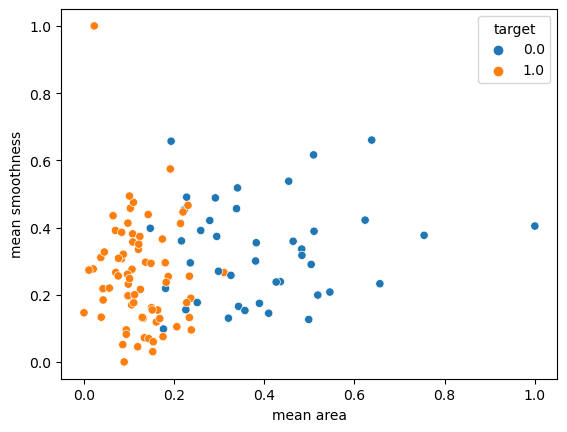

In [58]:
sns.scatterplot(x = x_test_scaled['mean area'], y = x_test_scaled['mean smoothness'], hue = y_test);

In [59]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)

SVC()

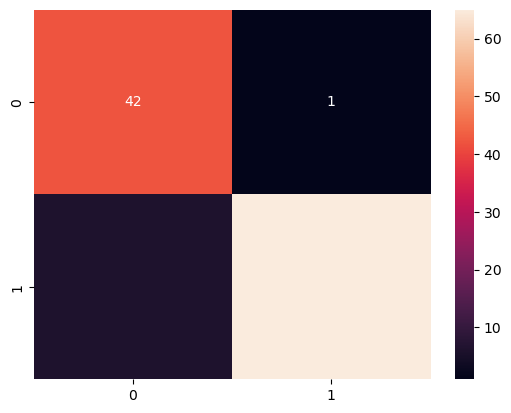

In [71]:
y_predict = svc_model.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True, fmt="d");

In [62]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91        43
         1.0       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



# imporving the model 

In [72]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [76]:
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.978 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [77]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [88]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [89]:
#grid_predictions = y_predict

In [90]:
cm = confusion_matrix(y_test, grid_predictions)

<Axes: >

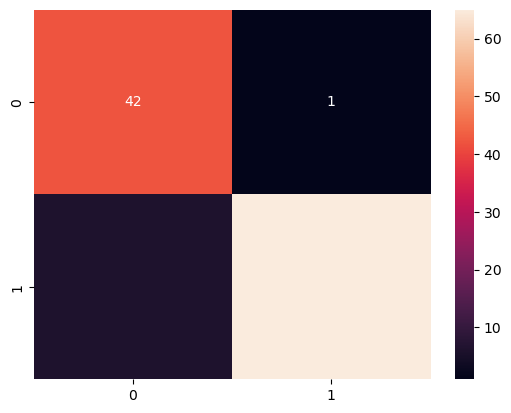

In [91]:
sns.heatmap(cm, annot=True)

In [92]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92        43
         1.0       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



# Thank You 